 # Phần 1: Import thư viện và tạo mảng ngẫu nhiên


In [1]:
import numpy as np

## Tạo mảng ngẫu nhiên 2 chiều (ví dụ: 5 hàng, 4 cột) với các số nguyên từ 0 đến 100

In [2]:
# Sử dụng np.random.randint
arr = np.random.randint(0, 100, size=(5,4))
print("Mảng ngẫu nhiên gốc:")
print(arr)

Mảng ngẫu nhiên gốc:
[[ 0 61 37 84]
 [78 91 92 44]
 [63 98 73 62]
 [54 57 78 39]
 [ 3  4 98 83]]


## Thực hiện các thao tác với mảng

In [3]:
# 1. Các phép toán số học với số
print("Cộng 10 vào mảng:")
arr_plus_10 = arr + 10
print(arr_plus_10)

print("Trừ 5 vào mảng:")
arr_minus_5 = arr - 5
print(arr_minus_5)

print("Nhân mảng với 3:")
arr_multi_3 = arr * 3
print(arr_multi_3)

print("Chia mảng cho 2:")
arr_div_2 = arr/2
print(arr_div_2)

Cộng 10 vào mảng:
[[ 10  71  47  94]
 [ 88 101 102  54]
 [ 73 108  83  72]
 [ 64  67  88  49]
 [ 13  14 108  93]]
Trừ 5 vào mảng:
[[-5 56 32 79]
 [73 86 87 39]
 [58 93 68 57]
 [49 52 73 34]
 [-2 -1 93 78]]
Nhân mảng với 3:
[[  0 183 111 252]
 [234 273 276 132]
 [189 294 219 186]
 [162 171 234 117]
 [  9  12 294 249]]
Chia mảng cho 2:
[[ 0.  30.5 18.5 42. ]
 [39.  45.5 46.  22. ]
 [31.5 49.  36.5 31. ]
 [27.  28.5 39.  19.5]
 [ 1.5  2.  49.  41.5]]


In [4]:
# 2. Các hàm thống kê cơ bản
print("Các giá trị thống kê:")

print(f"Tổng tất cả các phần tử: {np.sum(arr)}")
print(f"Giá trị trung bình: {np.mean(arr)}")
print(f"GTLN: {np.max(arr)}")
print(f"GTNN: {np.min(arr)}")

Các giá trị thống kê:
Tổng tất cả các phần tử: 1199
Giá trị trung bình: 59.95
GTLN: 98
GTNN: 0


In [5]:
# 3 Indexing và Slicing
print("Indexing & Slicing")

# Lưu ý rằng chỉ số của các hàng các cột trong mảng bắt đầu từ 0
print(f"Phần tử ở hàng 2 cột 3: {arr[1,2]}")

print(f"Hàng thứ 3 (index 2) của mảng là: {arr[2, :]}")

print(f"Cột thứ 2 (index 1) của mảng là: {arr[:, 1]}")

Indexing & Slicing
Phần tử ở hàng 2 cột 3: 92
Hàng thứ 3 (index 2) của mảng là: [63 98 73 62]
Cột thứ 2 (index 1) của mảng là: [61 91 98 57  4]


In [6]:
# 4. Boolean Masking
print("Các phần từ lớn hơn 50:")

mask = arr > 50
print(f"Mảng boolena (true/false):\n {mask}")

print(f"Các giá trị thỏa mãn (>50): {arr[mask]}")

Các phần từ lớn hơn 50:
Mảng boolena (true/false):
 [[False  True False  True]
 [ True  True  True False]
 [ True  True  True  True]
 [ True  True  True False]
 [False False  True  True]]
Các giá trị thỏa mãn (>50): [61 84 78 91 92 63 98 73 62 54 57 78 98 83]


In [7]:
# 5. Reshape
print("Reshape chuyển thành 2 hàng, 10 cột nếu đủ kích thước:\n")

reshaped_arr = arr.reshape(2, 10)

print(reshaped_arr)

Reshape chuyển thành 2 hàng, 10 cột nếu đủ kích thước:

[[ 0 61 37 84 78 91 92 44 63 98]
 [73 62 54 57 78 39  3  4 98 83]]


# Phần 2: Phát hiện đối tượng trong ảnh với OpenCV

## Tải ảnh từ Internet và import thư viện

In [8]:
import requests
from PIL import Image
from io import BytesIO
img_url = "https://i.pinimg.com/1200x/eb/ed/aa/ebedaa9f0a931197d545ea8ee981c5a6.jpg"

response = requests.get(img_url, stream = True)
img = Image.open(BytesIO(response.content))

# Lưu ảnh về colab để dùng cho các bước sau
img.save('original_image.jpg')
print("Tải ảnh xuống thành công")

Tải ảnh xuống thành công


## Phát hiện đối tượng với Open CV

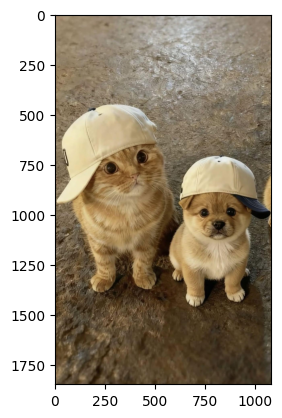

In [9]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Đọc ảnh đã tải về
img = cv2.imread('original_image.jpg')

# OpenCV đọc ảnh theo định dạng BGR, cần chuyển sang RGB để hiển thị đúng màu sắc với matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)



Số lượng đường bao tìm thấy: 1085


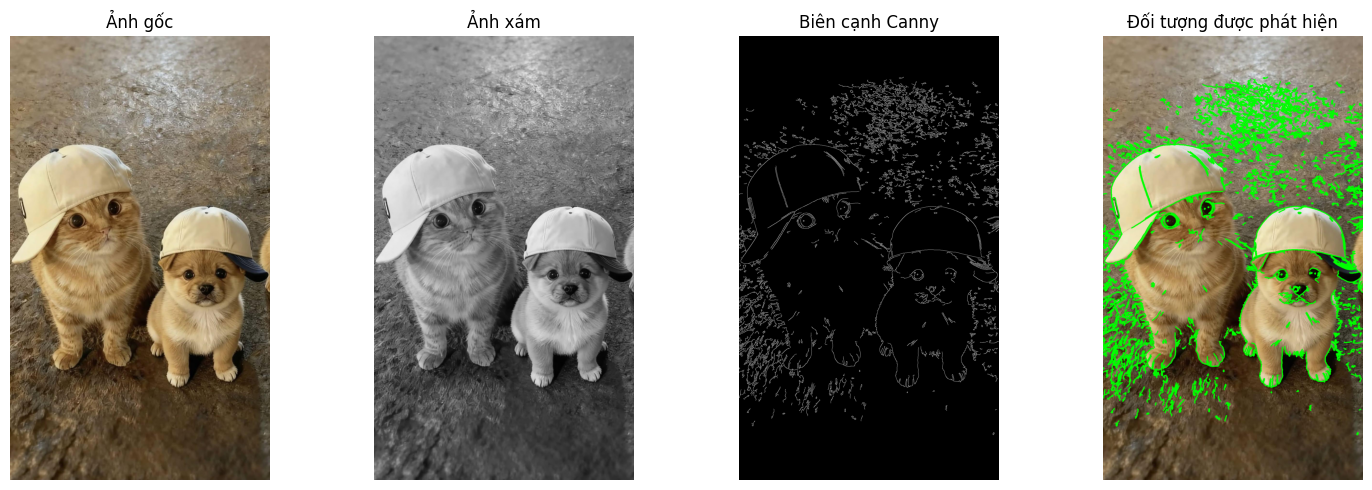

In [10]:
# 1. Chuyển sang ảnh xám
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. Làm mờ một chút để giảm nhiễu (tùy chọn nhưng nên dùng)
blurred = cv2.GaussianBlur(gray, (5,5), 0)

# 3. Phát hiện biên cạnh bằng Canny
edges = cv2.Canny(blurred, 50, 150)

# 4. Tìm đường bao từ ảnh biên
# cv2.RETR_EXTERNAL chỉ lấy đường bao ngoài cùng, cv2.CHAIN_APPROX_SIMPLE nén đường bao để tiết kiệm bộ nhớ
contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(f"Số lượng đường bao tìm thấy: {len(contours)}")

# 5. Vẽ các đường bao lên ảnh gốc (bản sao để giữ bản gốc không bị thay đổi)
img_with_contours = img_rgb.copy()
cv2.drawContours(img_with_contours, contours, -1, (0, 255, 0), 3) # Vẽ tất cả contours, màu xanh lá, độ dày 3

# Hiển thị kết quả
plt.figure(figsize=(15,5))

plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gray, cmap='gray')
plt.title('Ảnh xám')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(edges, cmap='gray')
plt.title('Biên cạnh Canny')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img_with_contours)
plt.title('Đối tượng được phát hiện')
plt.axis('off')

plt.tight_layout()
plt.show()



# Phần 3: Tự xây dựng hàm vẽ hình chữ nhật

In [11]:
# Hàm my_rectangle và demo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


3.1 Demo trên ảnh đen:


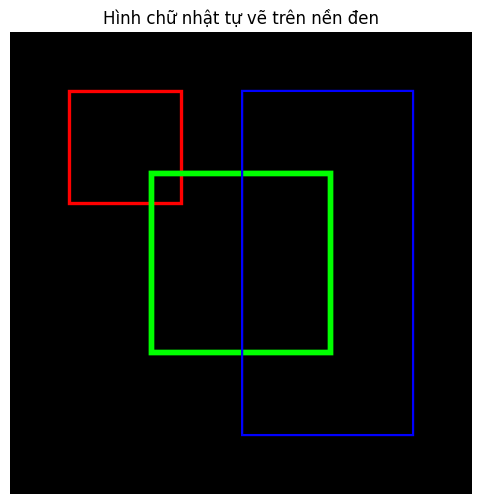


3.2 Demo trên ảnh thật:


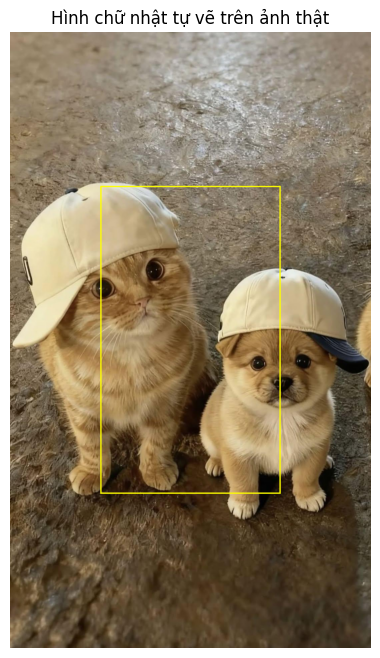

Phát hiện 1085 object:


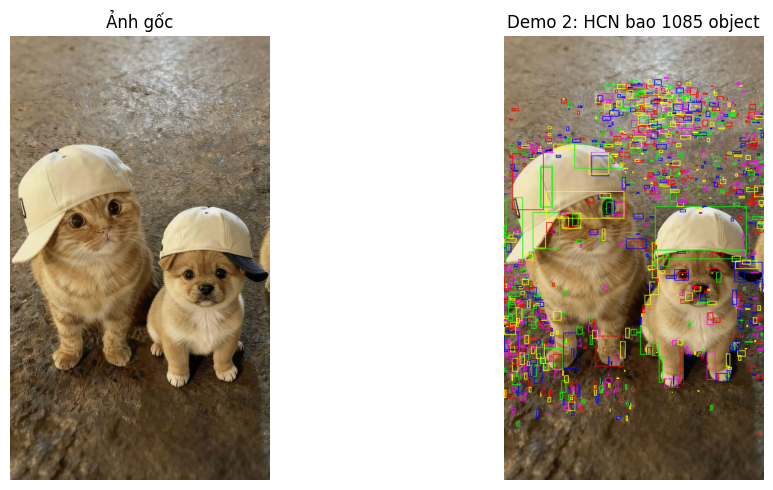

In [27]:
# --- Cell 4: Hàm my_rectangle và demo ---
import numpy as np
import matplotlib.pyplot as plt

def my_rectangle(img, pt1, pt2, color, thickness=3):
    """
    Vẽ hình chữ nhật lên ảnh (mảng NumPy).
    Args:
        img: Mảng NumPy của ảnh (dạng H x W x C).
        pt1: Tuple (x1, y1) - góc trên bên trái.
        pt2: Tuple (x2, y2) - góc dưới bên phải.
        color: Tuple (R, G, B) - màu sắc.
        thickness: Độ dày của đường viền (mặc định 3).
    """
    x1, y1 = pt1
    x2, y2 = pt2
    h, w = img.shape[:2] # Lấy chiều cao và chiều rộng ảnh

    # Đảm bảo tọa độ nằm trong ảnh (xử lý lỗi cơ bản)
    x1, x2 = max(0, x1), min(w, x2)
    y1, y2 = max(0, y1), min(h, y2)

    # Vẽ cạnh trên và dưới
    for t in range(thickness):
        # Cạnh trên (hàng y1 + t)
        if y1 + t < h:
            img[y1 + t, x1:x2] = color
        # Cạnh dưới (hàng y2 - t)
        if y2 - t - 1 >= 0:
            img[y2 - t - 1, x1:x2] = color

    # Vẽ cạnh trái và phải
    for t in range(thickness):
        # Cạnh trái (cột x1 + t)
        if x1 + t < w:
            img[y1:y2, x1 + t] = color
        # Cạnh phải (cột x2 - t)
        if x2 - t - 1 >= 0:
            img[y1:y2, x2 - t - 1] = color

    return img

# --- Demo hàm ---
# 1. Demo trên ảnh đen
print("\n3.1 Demo trên ảnh đen:")
black_img = np.zeros((400, 400, 3), dtype=np.uint8)

# Vẽ nhiều hình chữ nhật
black_img = my_rectangle(black_img, (50, 50), (150, 150), (255, 0, 0), 3)     # Đỏ
black_img = my_rectangle(black_img, (120, 120), (280, 280), (0, 255, 0), 5)   # Xanh lá
black_img = my_rectangle(black_img, (200, 50), (350, 350), (0, 0, 255), 2)    # Xanh dương

plt.figure(figsize=(6, 6))
plt.imshow(black_img)
plt.title("Hình chữ nhật tự vẽ trên nền đen")
plt.axis('off')
plt.show()

# 2. Demo trên ảnh thật - HCN giữa ảnh
print("\n3.2 Demo trên ảnh thật:")
real_img = cv2.imread('original_image.jpg')
if real_img is not None:
    real_img_rgb = cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB)
    h, w = real_img_rgb.shape[:2]

    # Vẽ khung bao quanh ảnh
    real_img_rgb = my_rectangle(real_img_rgb,
                                (w//4, h//4),
                                (3*w//4, 3*h//4),
                                (255, 255, 0),  # Màu vàng
                                4)

    plt.figure(figsize=(8, 8))
    plt.imshow(real_img_rgb)
    plt.title("Hình chữ nhật tự vẽ trên ảnh thật")
    plt.axis('off')
    plt.show()
else:
    print("Không tìm thấy ảnh để demo")

# 3. Demo trên ảnh thật - HCN bao quanh object
# Đọc lại ảnh
object_img = cv2.imread('original_image.jpg')
if object_img is not None:
    object_img_rgb = cv2.cvtColor(object_img, cv2.COLOR_BGR2RGB)
    img_with_object_rect = object_img_rgb.copy()

    # Phát hiện object lại (để lấy tọa độ)
    gray_obj = cv2.cvtColor(object_img, cv2.COLOR_BGR2GRAY)
    blurred_obj = cv2.GaussianBlur(gray_obj, (5, 5), 0)
    edges_obj = cv2.Canny(blurred_obj, 50, 150)
    contours_obj, _ = cv2.findContours(edges_obj, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    print(f"Phát hiện {len(contours_obj)} object:")

    # Vẽ HCN bao từng object
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255)]
    for i, contour in enumerate(contours_obj):
        x, y, w_obj, h_obj = cv2.boundingRect(contour)

        # Chọn màu khác nhau cho mỗi object
        color = colors[i % len(colors)]

        # Vẽ bằng hàm tự viết
        img_with_object_rect = my_rectangle(img_with_object_rect,
                                           (x, y),
                                           (x + w_obj, y + h_obj),
                                           color,
                                           3)

       #  print(f"   Object {i+1}: vị trí ({x}, {y}), kích thước {w_obj}x{h_obj}, màu {color}")

    # Hiển thị kết quả
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(object_img_rgb)
    plt.title("Ảnh gốc")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_with_object_rect)
    plt.title(f"Demo 2: HCN bao {len(contours_obj)} object")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

